# Importation des modules et packages

### Webscrapping et importation des données

In [1]:
!pip install lxml
import requests 
import urllib
import bs4
import pandas as pd
from urllib import request
import re
from tqdm import tqdm
from scipy import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 18.2 MB/s eta 0:00:0000:0100:01


### Visualisation et analyse des données

In [2]:
# Lecture et traitement du dataframe
import pandas as pd 
import numpy as np 

# Rapport sur les données pandas :
!pip install pandas_profiling 
!pip install ipywidgets
from pandas_profiling import ProfileReport

# Visualisation et analyse graphique des données
import matplotlib.pyplot as plt

# Visualisation et analyse cartographique des données
!pip install pandas fiona shapely pyproj rtree
!pip install contextily
!pip install geopandas
import geopandas as gpd
import contextily as ctx

# Corrélation entre les données
import seaborn as sns 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 16.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 21.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 18.8 MB/s eta 0:00:0000:0100:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=f79f660c3004ea9b138c6ef3119c191dbb269cf87367044d3987b2b4f3b63af3
  Stored in directory: /home/onyxia/.cache/pip/wheels/ea/1c/a8/5cec3479cd45136a7111e2d96aac299b219b199c411665250b
Successfully built htmlmin
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 kB 5.7 MB/s eta

### Modélisation

In [3]:
# Pour normaliser les données, on choisit MinMaxScaler de la librairie Sklearn
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split

#
from sklearn.linear_model import Ridge

#
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, explained_variance_score

----------------------------------------------------------------------------------------------------------------

# Récupération des données 

## WebScrapping des noms de films sur Wikipédia 

On stocke tous les noms des films présents sur cette page dans une liste que l'on appelle Liste_films.
On modifie le format de certains titre : ' XXX (1967)' devient ' XXX '.\
Finalement, on récupère la longueur de la liste : elle est de ≈ 1500. 

In [4]:
response = requests.get(
	url="https://en.wikipedia.org/wiki/List_of_years_in_film",
)
soup = bs4.BeautifulSoup(response.content, 'html.parser')

title = soup.find(id="firstHeading")
print(title.string)

List of years in film


In [5]:
all_names= soup.findAll("i")
L=[]
for link in all_names :
    t=link.findAll('a')
    if len(t)!=0:
        r=t[0]['title']
        L.append(r)
# print(L)

On enlève les précisions entre parenthèses 

In [6]:
Liste_films= []
for i in L: 
    Liste_films.append(re.sub("\(.*?\)","()",i).replace("()",""))
#print(L2)
len(Liste_films)

1542

## Utilisation d'une API pour récupérer l'identifiant des films à partir de leur titre

On utilise l'API: The Movie Database API (TMDB API) pour laquelle nous avons dû faire une demande de clé : api_key\
On place ces identifiants dans une liste index.

### Cas particulier : on fixe le nom du film

On va utiliser une première requête d'API pour accéder aux ID des films scrappés sur Wikipédia.

In [7]:
api_key='28c6630049f5d468217e4f34963c03a6' #clé de l'API 
nom_du_film='Earth '

url_api=f"https://api.themoviedb.org/3/search/movie?api_key={api_key}&query={nom_du_film}" 

#requête pour trouver les infos ayant le nom_du_film en title 
req = requests.get(url_api)
wb = req.json()

# on récupère tous les indexs des films en question 
index=[]
for film in range(len(wb['results'])):
    index.append(wb['results'][film]['id'])
index  

[811367,
 82700,
 443297,
 55420,
 10946,
 5491,
 10176,
 31642,
 16300,
 13363,
 748853,
 11569,
 2210,
 88751,
 85949,
 641370,
 197624,
 347111,
 464593,
 238603]

##### Création d'une fonction qui renvoie, à titre fixé, tous les index des films scrappés sur Wikipedia.

In [8]:
api_key='28c6630049f5d468217e4f34963c03a6' #clé de l'API 

def get_id(nom):
    url_api=f"https://api.themoviedb.org/3/search/movie?api_key={api_key}&query={nom}" 
    #requête pour trouver les infos ayant le nom_du_film en title 
    req = requests.get(url_api)
    wb = req.json()


    # on récupère tous les indexs des films en question 
    index=[]
    for film in range(len(wb['results'])):
        index.append(wb['results'][film]['id'])
    return(index)



##### Récupération du détail des données grâce à une autre API 

Toujours sur TMDB API, on utilise cette fois l'id du film pour accéder à un grand nombre de données sur ce film : get detail. 
Pour cela on fait appel à la fonction précédente qui nous donnait les id correspondant au titre du film. 
On ajuste le format des données pour que les tailles des éléments nous permettent de convertir le dictionnaire
en DataFrame pandas. 

In [9]:
def df_avec_id(id):
    id_film= id
    url_new_api = f"https://api.themoviedb.org/3/movie/{id_film}?api_key={api_key}&language=en-US"
    req_new = requests.get(url_new_api)
    wb_new = req_new.json()
    
    
    #ajustement des données 
    if wb_new['belongs_to_collection']!=None: 
        wb_new['belongs_to_collection']=wb_new['belongs_to_collection']['name']
        
    wb_new['genres']=' , '.join([x['name'] for x in wb_new['genres']]) #on ne sélectionne que le nom des genres 
    wb_new['production_companies']=' , '.join([x['name'] for x in wb_new['production_companies']]) #on ne sélectionne que les noms (même pas les pays)
    wb_new['production_countries']=' , '.join([x['name'] for x in wb_new['production_countries']])
    wb_new['spoken_languages']=' , '.join([x['name'] for x in wb_new['spoken_languages']])
    
    df=pd.DataFrame(wb_new, index=[wb_new['id']])  #j'ai mis l'ID en index mais on peut aussi indexer à partie de 0
    # pour cela, on met index=[0]
    
    return (df)

### Généralisation et concaténation

On utilise les deux fonctions précédentes pour créer notre DataFrame all. 
On parcourt la liste des titres puis la liste des id pour chacun des films. 
On a donc une double-boucle for, ce qui s'avère couteux mais qui fonctionne au bout d'1h30. 

Un axe d'amélioration serait de réduire le temps pour cette collecte de données. 

In [10]:
def concat_all(liste):
    Liste_fail=[]
    
    DF_ALL=pd.DataFrame()
    for nom in tqdm(liste):
        #print(nom)
        ind=get_id(nom)
        for i in ind:
            try:
                df_2=df_avec_id(i)
                #print(df_2.budget)
                if df_2['budget'].all()>0:
                    DF_ALL=pd.concat([DF_ALL,df_2],axis=0)
                    
            except ValueError:
                Liste_fail.append([nom,i])
    print(Liste_fail)
    return DF_ALL

In [11]:
def concat_all_2(liste):
    Liste_fail=[]
    DF_ALL=pd.DataFrame()
    for nom in tqdm(liste):
        #print(nom)
        ind=get_id(nom)
        f_vect(ind)
    print(Liste_fail)
    return DF_ALL

In [12]:
def fonction_int(id):
    try:
                df_2=df_avec_id(id)
                #print(df_2.budget)
                if df_2['budget'].all()>0:
                    return(pd.DataFrame())
                    
    except ValueError:
                Liste_fail.append(id)
            

f_vect = np.vectorize(fonction_int)

In [13]:
l=Liste_films
a=concat_all(l)

100%|██████████| 1542/1542 [37:22<00:00,  1.45s/it] 

[]


## Création d'un fichier .csv
On va exporter ce fichier en csv pour ne pas à recharger à chaque fois car le chargement est chronophage (temps estimé : 30 minutes).

On enregistre le Dataframe all sous un fichier au format csv.

In [14]:
a.to_csv('Projet_films.csv',index=False) 

On vient charger le fichier 'ProjetFilms.csv' dans notre code pour pouvoir l'exploiter ensuite.

In [15]:
df=pd.read_csv('Projet_films.csv')

----------------------------------------------------------------------------------------------------------------

# Visualisation et analyse des données

In [16]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Nettoyage des données 

### Variables utiles
 
On commence par chercher les variables utiles pour notre analyse des données puis pour notre modèle de prédiction. 

D'après le Profile Report du début, on observe que tous les films sont classés "Adult", cette variable n'a donc ici que peu d'intérêt. 
On fait le choix de ne pas prendre en compte les variables suivantes pour notre modèle:
- adult 
- backdrop_path
- homepage
- id 
- imdb_id
- original title
- overview
- poster_path 

In [17]:
df.columns

Index(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [18]:
df_bis= df[['belongs_to_collection','budget','genres','original_language','production_countries','popularity','production_companies','release_date','revenue','runtime','spoken_languages','status','vote_average','vote_count']]

On ne garde que les films qui sont sortis 

In [19]:
df_bis=df_bis[df_bis.status=='Released']

On change le type des dates maintenant, il s'agit bien de datetime

In [20]:
df_bis.release_date=pd.to_datetime(df_bis.release_date, format='%Y-%m-%d', errors = 'ignore')

In [21]:
df_bis= df_bis[df_bis.runtime!=0]

In [22]:
df_bis['release_year']=df_bis['release_date'].dt.year 
df_bis['release_month']=df_bis['release_date'].dt.month 
df_bis['release_day']=df_bis['release_date'].dt.day 

On enlève les warnings causés pas le .iloc 

In [23]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

On retire les films dont le revenu n'est pas disponible (revenu fixé à 0 dans le dataset)

In [24]:
df_bis = df_bis[df_bis['revenue'] != 0]

### Résolution des problèmes du dataset
On travaille à présent sur les variables (genres, production countries...) de manière à obtenir un jeu données propre et exploitable. Pour cela, on va créer pour chaque genre une variable "Nom_du_Genre" ("Action" par exemple) qui vaudra 1 si le film appartient à ce genre et 0 sinon. De même pour la nationalité. Et enfin, de même pour la saga (créer une variable qui prend la valeur 1 si le film est une saga, 0 sinon).

#### La variable 'genre'
On va créer pour chaque genre une variable "nom du genre" qui vaudra 1 si le film appartient à ce genre et 0 sinon. Cela permettra de résoudre le problème de la multiappartenance.

In [25]:
Liste_genres= df_bis['genres'].unique()
p = re.compile(r'\W+')

Liste_finale=[]

for i in Liste_genres : 
    #print(str(i))
    sous_liste= p.split(str(i))
    for j in sous_liste :
        Liste_finale.append(j)
        
Liste_genre_finale = np.unique(Liste_finale)     
Liste_genre_finale

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Fiction', 'History',
       'Horror', 'Movie', 'Music', 'Mystery', 'Romance', 'Science', 'TV',
       'Thriller', 'War', 'Western', 'nan'], dtype='<U11')

In [26]:
for genre in Liste_genre_finale:
    df_bis[genre]= df_bis['genres'].str.contains(genre, case=False).astype(bool).astype(int)
df_bis.head(5)

belongs_to_collection     budget  \
0  The Matrix Collection  190000000   
1  The Matrix Collection   63000000   
2  The Matrix Collection  150000000   
3  The Matrix Collection  150000000   
4                    NaN   50000000   

                                            genres original_language  \
0             Science Fiction , Action , Adventure                en   
1                         Action , Science Fiction                en   
2  Adventure , Action , Thriller , Science Fiction                en   
3  Adventure , Action , Thriller , Science Fiction                en   
4                     Family , Fantasy , Adventure                en   

                 production_countries  popularity  \
0  Germany , United States of America     140.792   
1            United States of America      71.556   
2            United States of America      43.506   
3            United States of America      41.380   
4            United States of America      24.399   

                                production_companies release_date    revenue  \
0  Village Roadshow Pictures , Warner Bros. Pictu...   2021-12-16  156497322   
1  Village Roadshow Pictures , Warner Bros. Pictu...   1999-03-30  463517383   
2  Village Roadshow Pictures , NPV Entertainment ...   2003-05-15  738599701   
3  Village Roadshow Pictures , NPV Entertainment ...   2003-11-05  424988211   
4  TriStar Pictures , Calash Corporation , GGG , ...   1985-10-29   23717291   

   runtime  ... Movie Music  Mystery  Romance  Science  TV  Thriller  War  \
0      147  ...     0     0        0        0        1   0         0    0   
1      136  ...     0     0        0        0        1   0         0    0   
2      138  ...     0     0        0        0        1   0         1    0   
3      129  ...     0     0        0        0        1   0         1    0   
4      108  ...     0     0        0        0        0   0         0    0   

   Western  nan  
0        0    0  
1        0    0  
2        0    0  
3        0    0  
4        0    0  

[5 rows x 39 columns]

#### La variable 'production_countries'
On fait de même qu'avec les genres : on va créer pour chaque genre une variable "nom du genre" qui vaudra 1 si le film appartient à ce genre et 0 sinon. Cela permettra de résoudre le problème de la multiappartenance.

In [27]:
Liste_pays_prod= df_bis['production_countries'].unique()
Liste_finale=[]

for i in Liste_pays_prod : 
    #print(str(i))
    sous_liste= re.split(' ; | , ', str(i))
    for j in sous_liste :
        Liste_finale.append(j)
        
Liste_finale = np.unique(Liste_finale)     
Liste_finale

array(['Algeria', 'Argentina', 'Australia', 'Austria', 'Bahamas',
       'Belgium', 'Botswana', 'Brazil', 'Bulgaria', 'Canada', 'China',
       'Colombia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary',
       'India', 'Iran', 'Ireland', 'Israel', 'Italy', 'Japan', 'Lebanon',
       'Libyan Arab Jamahiriya', 'Luxembourg', 'Malta', 'Mexico',
       'Morocco', 'Netherlands', 'New Zealand', 'Norway', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Romania', 'Russia', 'Slovenia', 'South Africa', 'South Korea',
       'Soviet Union', 'Spain', 'Sweden', 'Switzerland', 'Taiwan',
       'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States of America', 'Vietnam', 'nan'], dtype='<U24')

In [30]:
for pays in Liste_finale:
    df_bis[pays]= df_bis['production_countries'].str.contains(pays, case=False).astype(bool).astype(int)
df_bis.head(5)

belongs_to_collection     budget  \
0  The Matrix Collection  190000000   
1  The Matrix Collection   63000000   
2  The Matrix Collection  150000000   
3  The Matrix Collection  150000000   
4                    NaN   50000000   

                                            genres original_language  \
0             Science Fiction , Action , Adventure                en   
1                         Action , Science Fiction                en   
2  Adventure , Action , Thriller , Science Fiction                en   
3  Adventure , Action , Thriller , Science Fiction                en   
4                     Family , Fantasy , Adventure                en   

                 production_countries  popularity  \
0  Germany , United States of America     111.268   
1            United States of America      65.036   
2            United States of America      36.031   
3            United States of America      33.191   
4            United States of America      17.428   

                                production_companies release_date    revenue  \
0  Village Roadshow Pictures , Warner Bros. Pictu...   2021-12-16  156497322   
1  Village Roadshow Pictures , Warner Bros. Pictu...   1999-03-30  463517383   
2  Village Roadshow Pictures , NPV Entertainment ...   2003-05-15  738599701   
3  Village Roadshow Pictures , NPV Entertainment ...   2003-11-05  424988211   
4  TriStar Pictures , Calash Corporation , GGG , ...   1985-10-29   23717291   

   runtime  ... Spain Sweden  Switzerland  Taiwan  Turkey  Ukraine  \
0      147  ...     0      0            0       0       0        0   
1      136  ...     0      0            0       0       0        0   
2      138  ...     0      0            0       0       0        0   
3      129  ...     0      0            0       0       0        0   
4      108  ...     0      0            0       0       0        0   

   United Arab Emirates  United Kingdom  United States of America  Vietnam  
0                     0               0                         1        0  
1                     0               0                         1        0  
2                     0               0                         1        0  
3                     0               0                         1        0  
4                     0               0                         1        0  

[5 rows x 96 columns]

In [28]:
df_bis.head(5)

belongs_to_collection     budget  \
0  The Matrix Collection  190000000   
1  The Matrix Collection   63000000   
2  The Matrix Collection  150000000   
3  The Matrix Collection  150000000   
4                    NaN   50000000   

                                            genres original_language  \
0             Science Fiction , Action , Adventure                en   
1                         Action , Science Fiction                en   
2  Adventure , Action , Thriller , Science Fiction                en   
3  Adventure , Action , Thriller , Science Fiction                en   
4                     Family , Fantasy , Adventure                en   

                 production_countries  popularity  \
0  Germany , United States of America     140.792   
1            United States of America      71.556   
2            United States of America      43.506   
3            United States of America      41.380   
4            United States of America      24.399   

                                production_companies release_date    revenue  \
0  Village Roadshow Pictures , Warner Bros. Pictu...   2021-12-16  156497322   
1  Village Roadshow Pictures , Warner Bros. Pictu...   1999-03-30  463517383   
2  Village Roadshow Pictures , NPV Entertainment ...   2003-05-15  738599701   
3  Village Roadshow Pictures , NPV Entertainment ...   2003-11-05  424988211   
4  TriStar Pictures , Calash Corporation , GGG , ...   1985-10-29   23717291   

   runtime  ... Movie Music  Mystery  Romance  Science  TV  Thriller  War  \
0      147  ...     0     0        0        0        1   0         0    0   
1      136  ...     0     0        0        0        1   0         0    0   
2      138  ...     0     0        0        0        1   0         1    0   
3      129  ...     0     0        0        0        1   0         1    0   
4      108  ...     0     0        0        0        0   0         0    0   

   Western  nan  
0        0    0  
1        0    0  
2        0    0  
3        0    0  
4        0    0  

[5 rows x 39 columns]

In [29]:
df_ter=df_bis.drop(['genres', 'production_countries'], axis=1, inplace = False)

In [30]:
df_ter.head(5)

belongs_to_collection     budget original_language  popularity  \
0  The Matrix Collection  190000000                en     140.792   
1  The Matrix Collection   63000000                en      71.556   
2  The Matrix Collection  150000000                en      43.506   
3  The Matrix Collection  150000000                en      41.380   
4                    NaN   50000000                en      24.399   

                                production_companies release_date    revenue  \
0  Village Roadshow Pictures , Warner Bros. Pictu...   2021-12-16  156497322   
1  Village Roadshow Pictures , Warner Bros. Pictu...   1999-03-30  463517383   
2  Village Roadshow Pictures , NPV Entertainment ...   2003-05-15  738599701   
3  Village Roadshow Pictures , NPV Entertainment ...   2003-11-05  424988211   
4  TriStar Pictures , Calash Corporation , GGG , ...   1985-10-29   23717291   

   runtime    spoken_languages    status  ...  Movie  Music  Mystery  Romance  \
0      147             English  Released  ...      0      0        0        0   
1      136             English  Released  ...      0      0        0        0   
2      138             English  Released  ...      0      0        0        0   
3      129  English , Français  Released  ...      0      0        0        0   
4      108             English  Released  ...      0      0        0        0   

   Science  TV  Thriller  War  Western  nan  
0        1   0         0    0        0    0  
1        1   0         0    0        0    0  
2        1   0         1    0        0    0  
3        1   0         1    0        0    0  
4        0   0         0    0        0    0  

[5 rows x 37 columns]

#### La variable saga / 'b_to_c'
On crée une nouvelle variable b_to_c qui vaut 1 ou 0 en fonction de si le film appartient à une collection ou pas.


In [31]:
df_ter['b_to_c']=pd.notnull(df_ter['belongs_to_collection']) #devient True et False
df_ter['b_to_c']=df_ter['b_to_c'].apply( lambda x : int(x))
df_ter.drop(['belongs_to_collection','production_companies','spoken_languages','status'], axis=1, inplace = True)
df_ter.head(5)

budget original_language  popularity release_date    revenue  runtime  \
0  190000000                en     140.792   2021-12-16  156497322      147   
1   63000000                en      71.556   1999-03-30  463517383      136   
2  150000000                en      43.506   2003-05-15  738599701      138   
3  150000000                en      41.380   2003-11-05  424988211      129   
4   50000000                en      24.399   1985-10-29   23717291      108   

   vote_average  vote_count  release_year  release_month  ...  Music  Mystery  \
0         6.581        4342        2021.0           12.0  ...      0        0   
1         8.195       22438        1999.0            3.0  ...      0        0   
2         7.025        9452        2003.0            5.0  ...      0        0   
3         6.700        8498        2003.0           11.0  ...      0        0   
4         6.305         208        1985.0           10.0  ...      0        0   

   Romance  Science  TV  Thriller  War  Western  nan  b_to_c  
0        0        1   0         0    0        0    0       1  
1        0        1   0         0    0        0    0       1  
2        0        1   0         1    0        0    0       1  
3        0        1   0         1    0        0    0       1  
4        0        0   0         0    0        0    0       0  

[5 rows x 34 columns]

#### La variable 'language'
On crée une nouvelle variable 'language' qui vaut 1 si la langue est parlée dans le film, 0 sinon.


In [32]:
orig_language=pd.get_dummies(df_ter['original_language'],drop_first=True)

In [33]:
Liste_des_langues = [i for i in orig_language.sum().sort_values(ascending=False).index[:5]]
Liste_des_langues.append('Others')
Liste_des_langues

['en', 'ja', 'fr', 'it', 'de', 'Others']

In [34]:
for langue in Liste_des_langues:
    if langue!='Others':
        df_ter[langue + '_original']= df_ter['original_language'].str.contains(langue, case=False).astype(bool).astype(int)
    else: 
        df_ter[langue +  '_original']= df_ter["original_language"].apply(lambda x: x not in Liste_des_langues).astype(int)
    df_ter

In [35]:
df_ter.drop(['original_language','release_date'], axis=1, inplace = True)

In [36]:
df_ter.head(5)

budget  popularity    revenue  runtime  vote_average  vote_count  \
0  190000000     140.792  156497322      147         6.581        4342   
1   63000000      71.556  463517383      136         8.195       22438   
2  150000000      43.506  738599701      138         7.025        9452   
3  150000000      41.380  424988211      129         6.700        8498   
4   50000000      24.399   23717291      108         6.305         208   

   release_year  release_month  release_day  Action  ...  War  Western  nan  \
0        2021.0           12.0         16.0       1  ...    0        0    0   
1        1999.0            3.0         30.0       1  ...    0        0    0   
2        2003.0            5.0         15.0       1  ...    0        0    0   
3        2003.0           11.0          5.0       1  ...    0        0    0   
4        1985.0           10.0         29.0       0  ...    0        0    0   

   b_to_c  en_original  ja_original  fr_original  it_original  de_original  \
0       1            1            0            0            0            0   
1       1            1            0            0            0            0   
2       1            1            0            0            0            0   
3       1            1            0            0            0            0   
4       0            1            0            0            0            0   

   Others_original  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 38 columns]

In [37]:
df_ter.columns

Index(['budget', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count', 'release_year', 'release_month', 'release_day', 'Action',
       'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Fiction', 'History', 'Horror', 'Movie', 'Music',
       'Mystery', 'Romance', 'Science', 'TV', 'Thriller', 'War', 'Western',
       'nan', 'b_to_c', 'en_original', 'ja_original', 'fr_original',
       'it_original', 'de_original', 'Others_original'],
      dtype='object')

## Visualisation et analyse graphique

Visualisons tout d'abord nos données brutes pour comprendre la répartition des films sélectionnés selon un certain nombre de critères.

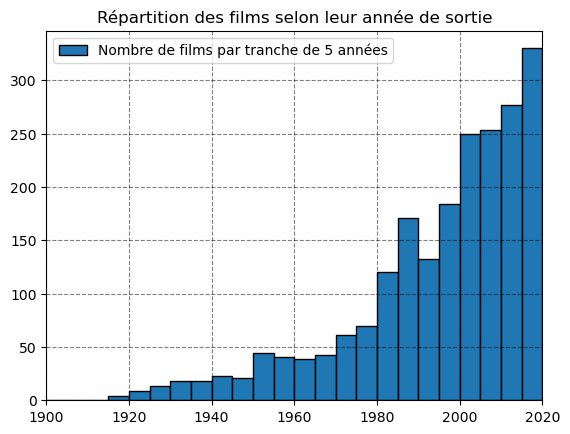

In [40]:
%matplotlib inline
plt.hist(df_ter["release_year"], bins = [x for x in range(1900, 2025,5)] ,label = "Nombre de films par tranche de 5 années", ec = "black")
plt.grid(linestyle = "dashed", alpha = 0.5, color = "black")
plt.xlim([1900,2020])
plt.title("Répartition des films selon leur année de sortie")
plt.legend()
plt.show()

In [68]:
print(df_ter.groupby(df_ter["release_month"]).size()[12])

331


In [73]:
x_axis_labels = ["January","Febryary","March","April","May","June","July","August","September","October","November","December"]
"""
mask1 = []
mask2 = []
for i in range(1,13):
    if df_ter.groupby(df_ter["release_month"]).size()[i] < df_ter.groupby(df_ter["release_month"]).size().mean():
        mask1.append(df_ter.groupby(df_ter["release_month"]).size()[i]
    else:
        mask2.append(df_ter.groupby(df_ter["release_month"]).size()[i]

plt.hist(df_ter["release_month"][mask1], bins = [x for x in range(1, 14)] , label = "Nombre de films sortis chaque mois", ec = "black")
plt.hist(df_ter["release_month"][mask2], bins = [x for x in range(1, 14)] , ec = "black")
   """                  
plt.hist(df_ter["release_month"], bins = [x for x in range(1, 14)] , label = "Nombre de films sortis chaque mois", ec = "black")
plt.grid(linestyle = "dashed", alpha = 0.5, color = "black")
plt.xlim([1,13])
plt.xticks(range(1,13), rotation = 45, labels = x_axis_labels)
plt.title("Répartition des films selon leur mois de sortie")
plt.legend()
plt.show()

SyntaxError: invalid syntax (3933619710.py, line 8)

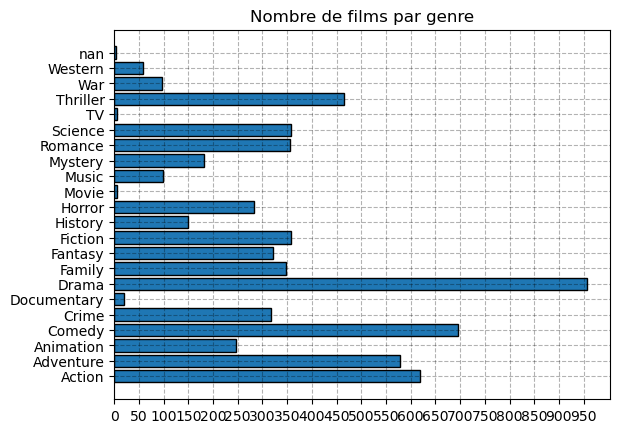

In [42]:
y = []
for genre in list(df_ter.columns)[9:31]:
    y.append(genre) 
x = []
for genre_name in y:
    x.append(df_ter.groupby(df_ter[genre_name]).size()[1])
plt.barh(y, width = x, edgecolor = "black")
plt.yticks(range(22), labels = y)
plt.title('Nombre de films par genre')
grid_points = [x for x in range(0, 1000, 50)]
plt.xticks(grid_points)
plt.grid(linestyle = "dashed", alpha = 0.3, color = "black")
plt.show()

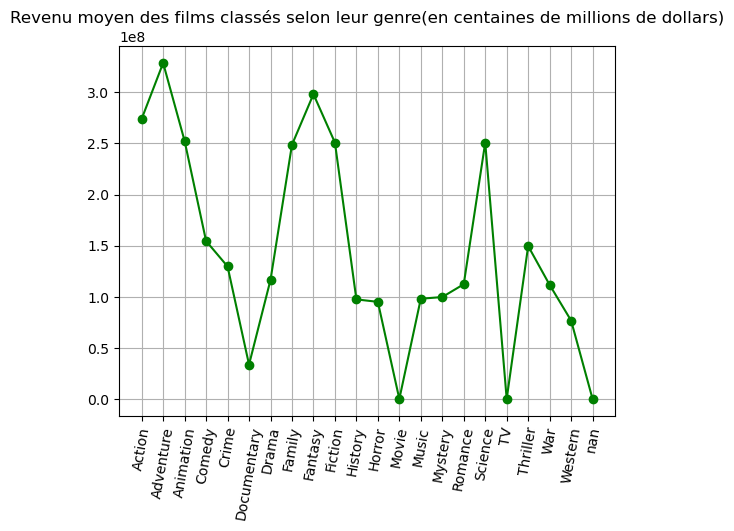

In [47]:
#       Liste des différents genres de films contenus dans le dataframe :
#        ['Action',
#       'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
#       'Family', 'Fantasy', 'Fiction', 'History', 'Horror', 'Movie', 'Music',
#       'Mystery', 'Romance', 'Science', 'TV', 'Thriller', 'War', 'Western',
#       'nan']
# Tout d'abord on créé une liste contenant tous ces genres
x = []
for genre in list(df_ter.columns)[9:31]:
    x.append(genre) 
y = []
for genre_name in x:
    y.append(df_ter.groupby(df_ter[genre_name])['revenue'].mean()[1])
x_prime = [x for x in range(22)]
plt.plot(x_prime,y,'-og')
plt.xticks(range(22), rotation = 80, labels = x)
plt.title('Revenu moyen des films classés selon leur genre(en centaines de millions de dollars)')
plt.grid()
plt.show()

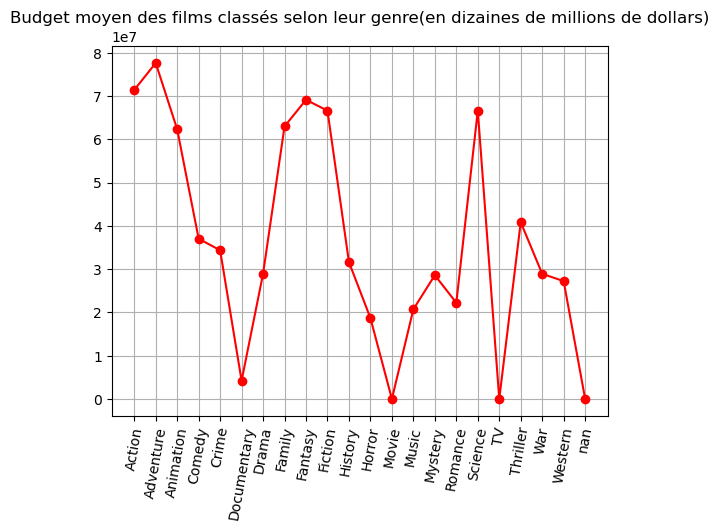

In [49]:
x = []
for genre in list(df_ter.columns)[9:31]:
    x.append(genre) 
y = []
for genre_name in x:
    y.append(df_ter.groupby(df_ter[genre_name])['budget'].mean()[1])
x_prime = [x for x in range(22)]
plt.plot(x_prime,y,'-or')
plt.xticks(range(22), rotation = 80, labels = x)
plt.xlim()
plt.title('Budget moyen des films classés selon leur genre(en dizaines de millions de dollars)')
plt.grid()
plt.show()

Regardons maintenant si l'on peut trouver des liens entre nos données descriptives et les revenus générés par les films sélectionnés (le revenu du film étant, dans la partie modélisation, ce que l'on cherchera à prédir).

Nous utilisons "xlim" et "ylim" pour écarter quelques valeurs extrêmes et avoir une vision plus claire de la plus grande partie de nos données.

Nous mettons aussi le revenu au logarithme pour limiter la dispersion de cette variable.

#### Lien Nombre de critiques reçues par le film - Chiffre d'affaires du film ?

In [39]:
plt.scatter(np.log(df_ter["vote_count"]), np.log(df_ter["revenue"]), s = 2, marker = ".")
plt.xlim([0,11])
plt.ylim([10,25])
plt.xlabel("Logarithme du nombre de critiques reçues par les films")
plt.ylabel("Logarithme des revenus générés par le film")
def f(x):
    return 1.1*x + 9.5
plt.plot([f(x) for x in range(30)], color = 'r', label = "potential regression line") 
plt.legend(loc='best')
plt.grid()
plt.title("Relation entre le revenu et le nombre de critique d'un film en échelle log")
plt.show()

/opt/mamba/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


On observe un lien qui semble linéaire entre le logarithme du nombre de critiques reçues par les films et le logarithme des revenus générés par les films de notre DataFrame. Una augmentation en pourcentage du nombre de critiques semble donc augmenter d'un certain pourcentage les revenus des films. 

#### Lien Budget de réalisation du film - Chiffre d'affaires du film ?

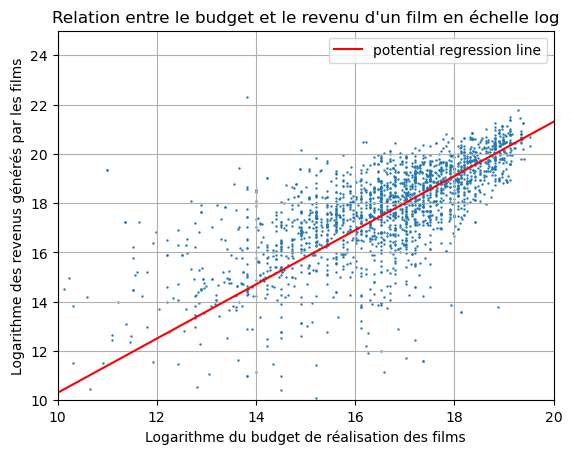

In [72]:
plt.scatter(np.log(df_ter["budget"]), np.log(df_ter["revenue"]), s = 2, marker = ".")
plt.xlim([10,20])
plt.ylim([10,25])
plt.xlabel("Logarithme du budget de réalisation des films")
plt.ylabel("Logarithme des revenus générés par les films")
def f(x):
    return 1.1*x - 0.7
plt.plot([f(x) for x in range(30)], color = 'r', label = "potential regression line") 
plt.legend(loc='best')
plt.title("Relation entre le budget et le revenu d'un film en échelle log")
plt.grid()
plt.show()

De la même façon, on observe un lien qui semble linéaire entre le logarithme des budgets des films et le logarithme des revenus générés par les films de notre DataFrame. Una augmentation en pourcentage du budget semble donc augmenter d'un certain pourcentage les revenus des films. La dispersion semble de plus se réduire quand le budget augmente. Un film avec un budget important semble donc assurer un certain succès commercial à ce dernier.

#### Lien année de sortie du film - chiffre d'affaire du film

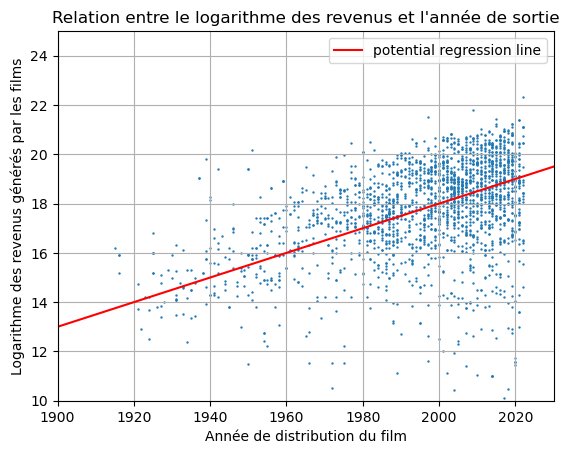

In [162]:
plt.scatter(df_ter["release_year"], np.log(df_ter["revenue"]), s = 2, marker = ".")
plt.ylim([10,25])
plt.xlim([1900,2030])
plt.xlabel("Année de distribution du film")
plt.ylabel("Logarithme des revenus générés par les films")
def f(x):
    return 0.05*x - 82
plt.plot([f(x) for x in range(2500)], color = 'r', label = "potential regression line") 
plt.legend(loc='best')
plt.grid()
plt.title("Relation entre le logarithme des revenus et l'année de sortie")
plt.show()

On observe un lien qui semble linéaire entre l'année de distribution des films et le logarithme des revenus générés par les films. Les films plus récents semble donc générer un pourcentage plus élevé de revenus.

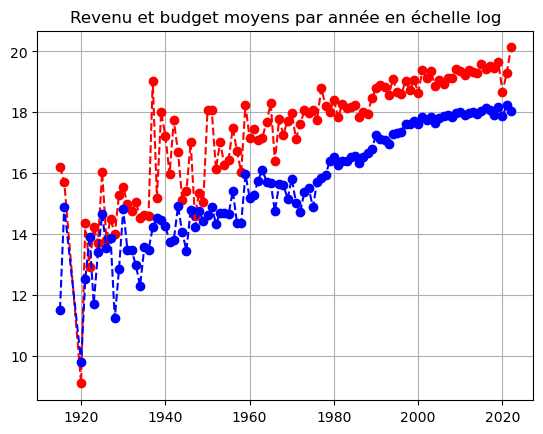

In [166]:
x = df_ter['release_year'].sort_values().unique()[:len(df_ter['release_year'].sort_values().unique())-1] 
#liste des annnées possibles 
y = np.log(df_ter.groupby('release_year')['revenue'].mean())
#revenue moyen 

y_2 =np.log(df_ter.groupby('release_year')['budget'].mean())


fig, ax = plt.subplots()
ax.plot(x, y, 'ro--')
ax.plot(x, y_2, 'bo--')
#plt.legend('Revenue', 'Budget')
plt.title('Revenu et budget moyens par année en échelle log')
plt.grid()
plt.show()

## Visualisation et analyse cartographique des données

#### Lien Pays de réalisation du film - Chiffre d'affaires du film ?

#### Lien Langues parlées dans le film - Chiffre d'affaires du film ?

In [75]:
import plotly.graph_objects as go

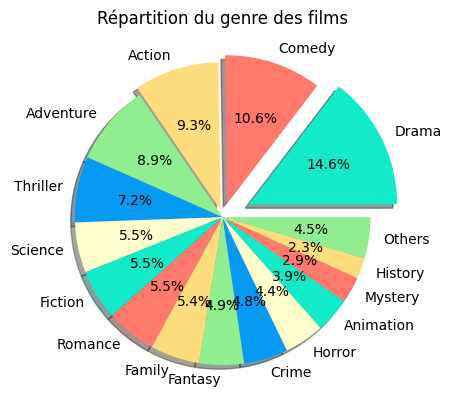

In [185]:
L=[]
Genres=[]
for genre in Liste_genre_finale:
    l=0
    l=df_ter[genre].sum()
    L.append(l)
    Genres.append(genre)
#print(L) 
O=pd.DataFrame({'Count': L , 'Genre': Genres })
O.sort_values(by='Count', ascending=False, inplace=True)

DF=O[:15]
autre= O[15:].Count.sum()
Liste=list(DF.Count)
Liste.append(autre)
Labels=list(DF.Genre)
Labels.append("Others")

colors= ['#13EAC9','#FF796C','#FBDD7E','#90EE90','#069AF3','#FFFFCB']
myexplode = [0.2, 0.1, 0.05, 0,0,0,0,0,0,0,0,0,0,0,0,0]

plt.pie(Liste, labels = Labels, explode = myexplode, colors=colors,autopct='%1.1f%%', startangle=0, shadow = True)
plt.title("Répartition du genre des films")
plt.show() 

----------------------------------------------------------------------------------------------------------------

# Modélisation

## Preprocessing

On utilise le dataset le plus propres "df_ter", travaillé prélablement, duquel on retire les NaNs pour pouvoir créer un algorithme de modélisation.

In [361]:
df_4=df_ter.copy()

In [362]:
df_4.dropna(inplace=True)

In [363]:
df_4.revenue=np.log(df_4.revenue)
df_4.budget=np.log(df_4.budget)

In [364]:
X=df_4.drop(['revenue'],axis=1)
y= df_4['revenue']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1 )
X_t=X_train.copy()

In [365]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV

In [366]:
scaler=StandardScaler() #MinMaxScaler
X_train = scaler.fit_transform(X_train) #fit_transform is a easy way to do the following normally 
X_test= scaler.fit_transform(X_test)

/opt/anaconda3/envs/jupyterlab-3.3.2/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.

/opt/anaconda3/envs/jupyterlab-3.3.2/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.

/opt/anaconda3/envs/jupyterlab-3.3.2/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.

/opt/anaconda3/envs/jupyterlab-3.3.2/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised i

In [367]:
model=RidgeCV()
model.fit(X_train,y_train)

predictions = model.predict(X_test)
print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')

model score on training data: 0.6583071258623114
model score on testing data: 0.3798306894886718


On a un meilleur score en mettant le Revenu et le budget en log 

In [368]:
print( "La Mean Absolute Percentage Error (MAPE) est de " + str(mean_absolute_percentage_error(y_test, predictions)))
print( "La Mean Absolute Error (MAE) est de " + str(mean_absolute_error(y_test, predictions)))
print( "La Mean Squared Error (MSE) est de " + str(mean_squared_error(y_test, predictions)))
print( "Le Explained Variance Score est de " + str(explained_variance_score(y_test, predictions)))

La Mean Absolute Percentage Error (MAPE) est de 0.0750186719026753
La Mean Absolute Error (MAE) est de 1.0824901835320722
La Mean Squared Error (MSE) est de 3.2549207508410456
Le Explained Variance Score est de 0.3835532761514767


In [369]:
X_t

budget  popularity  runtime  release_year  release_month  \
813   16.835935      39.857       99        1983.0            7.0   
2697  17.926384     175.208       97        2021.0            5.0   
2214  17.909855      24.910      117        2002.0           12.0   
2202  18.450240      82.818      100        2013.0            5.0   
657   18.348110      64.804      105        2011.0            8.0   
...         ...         ...      ...           ...            ...   
2037  17.504390     573.596       77        2005.0            9.0   
2033  18.826146      83.284       89        2008.0           10.0   
2116  17.034386      23.691      113        2007.0            5.0   
1354  15.424948      10.155       97        2007.0            9.0   
1954  15.894952      19.131      110        2003.0           12.0   

      release_day  Action  Adventure  Animation  Comedy  ...  United Kingdom  \
813          22.0       0          0          0       0  ...               0   
2697         21.0       0          0          0       0  ...               0   
2214         13.0       1          1          0       0  ...               0   
2202         23.0       0          0          0       1  ...               0   
657           3.0       1          0          0       0  ...               0   
...           ...     ...        ...        ...     ...  ...             ...   
2037         12.0       0          0          1       0  ...               0   
2033         30.0       0          1          1       1  ...               0   
2116         22.0       1          0          0       0  ...               0   
1354          7.0       0          0          0       1  ...               0   
1954         24.0       0          0          0       0  ...               0   

      United States of America  Vietnam  b_to_c  en_original  ja_original  \
813                          1        0       1            1            0   
2697                         1        0       1            1            0   
2214                         1        0       1            1            0   
2202                         1        0       1            1            0   
657                          1        0       1            1            0   
...                        ...      ...     ...          ...          ...   
2037                         1        0       0            1            0   
2033                         1        0       1            1            0   
2116                         1        0       0            1            0   
1354                         1        0       0            1            0   
1954                         1        0       1            1            0   

      fr_original  it_original  de_original  Others_original  
813             0            0            0                0  
2697            0            0            0                0  
2214            0            0            0                0  
2202            0            0            0                0  
657             0            0            0                0  
...           ...          ...          ...              ...  
2037            0            0            0                0  
2033            0            0            0                0  
2116            0            0            0                0  
1354            0            0            0                0  
1954            0            0            0                0  

[1954 rows x 94 columns]

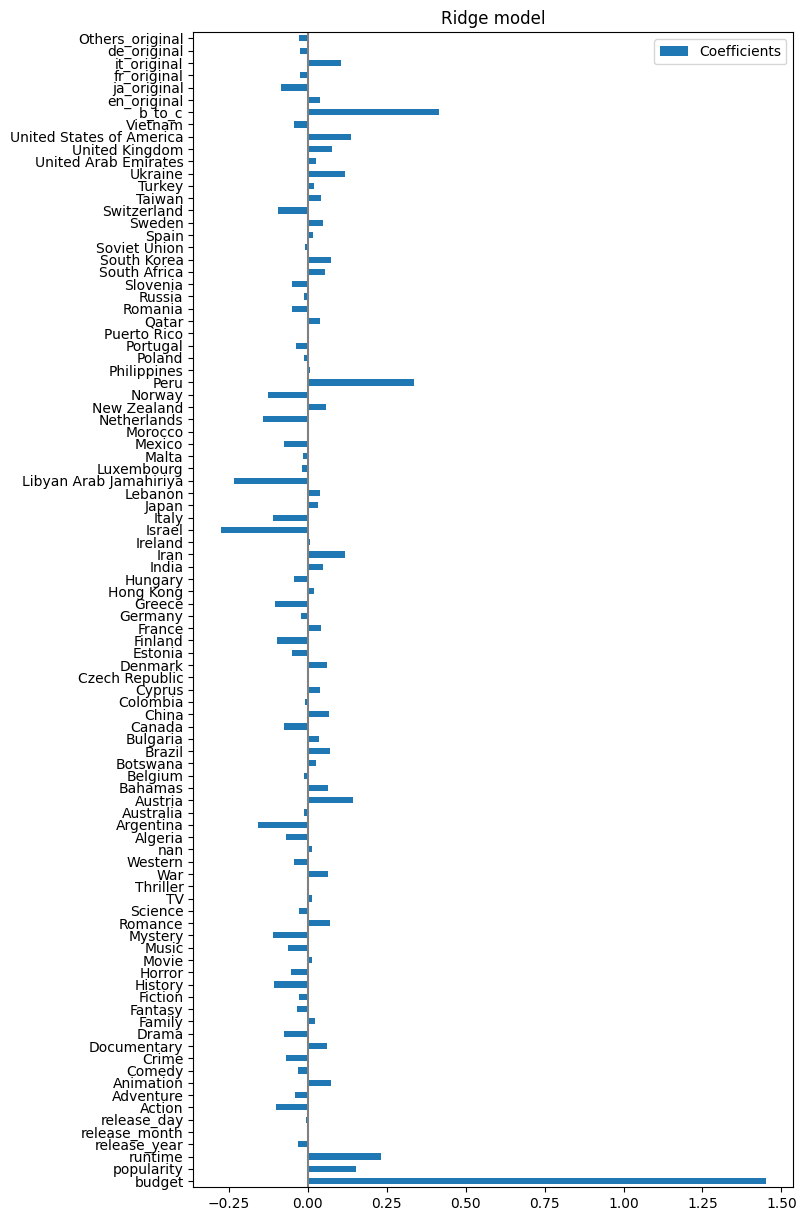

In [370]:
import matplotlib.pyplot as plt

coefs = pd.DataFrame(
   model.coef_,
   columns=['Coefficients'], index=X_t.columns
)

coefs.plot(kind='barh', figsize=(10, 15))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [371]:
from sklearn.ensemble import RandomForestRegressor

In [372]:
model = RandomForestRegressor()

model.fit(X_train, y_train)

print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')

model score on training data: 0.9592107327133979
model score on testing data: 0.29234950478220934


In [373]:
importances = model.feature_importances_

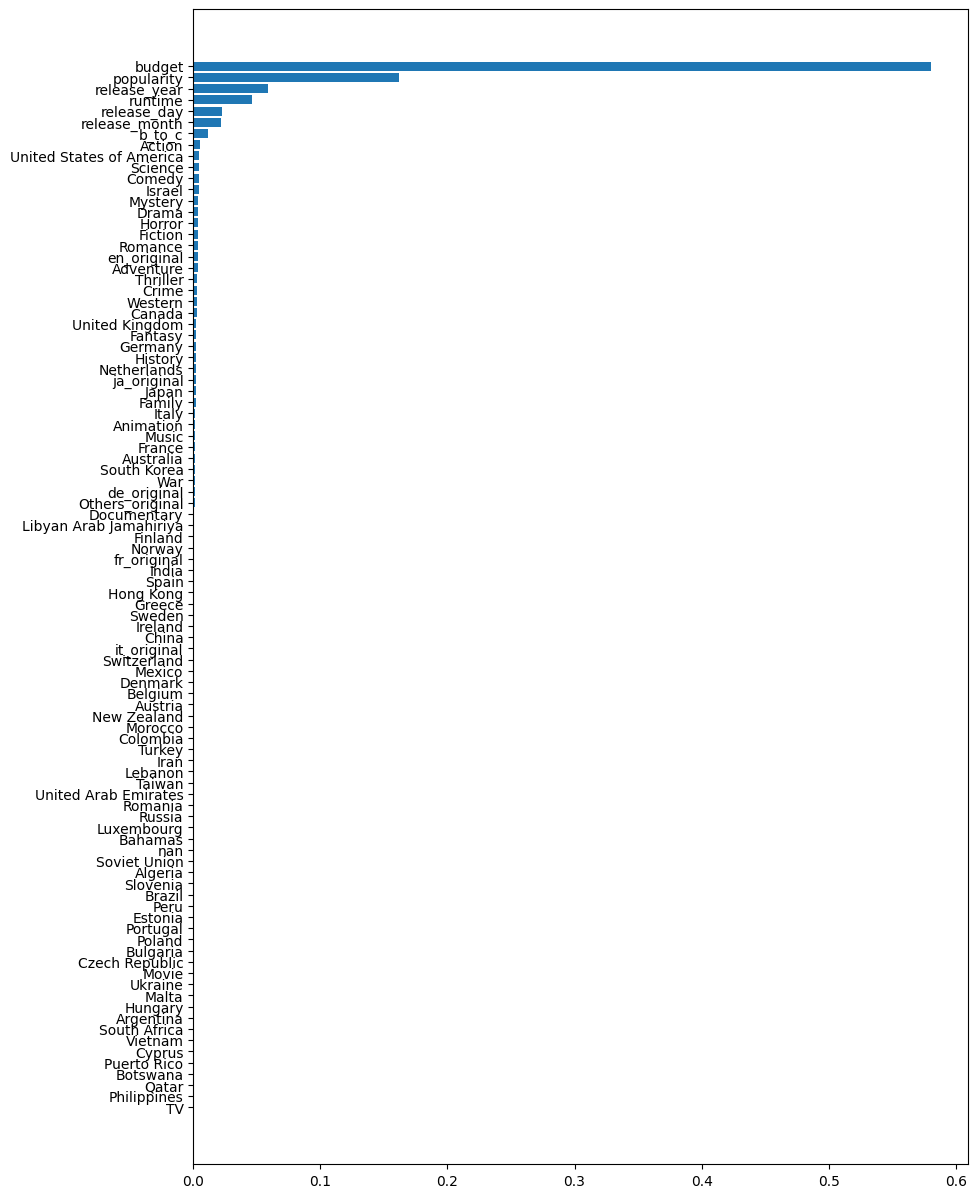

In [374]:
indices = np.argsort(importances)


fig, ax = plt.subplots(figsize=(10, 15))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_t.columns)[indices])